In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('US_Accidents_March23.csv', nrows = 1000000)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 46 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1000000 non-null  object 
 1   Source                 1000000 non-null  object 
 2   Severity               1000000 non-null  int64  
 3   Start_Time             1000000 non-null  object 
 4   End_Time               1000000 non-null  object 
 5   Start_Lat              1000000 non-null  float64
 6   Start_Lng              1000000 non-null  float64
 7   End_Lat                0 non-null        float64
 8   End_Lng                0 non-null        float64
 9   Distance(mi)           1000000 non-null  float64
 10  Description            999999 non-null   object 
 11  Street                 998288 non-null   object 
 12  City                   999972 non-null   object 
 13  County                 1000000 non-null  object 
 14  State              

In [5]:
df.drop(['ID'], axis=1, inplace=True)

In [6]:
df.sample(5)

,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
576173,Source2,3,2022-06-28 10:49:54,2022-06-28 11:40:05,42.101402,-87.767540,NaN,NaN,0.00,Lane blocked due to crash on I-94 Edens Expy W...,Edens Expy W,Winnetka,Cook,IL,60093,US,US/Central,KPWK,2022-06-28 10:52:00,80.0,80.0,39.0,29.53,10.0,W,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
619519,Source2,3,2022-05-04 15:12:32,2022-05-04 15:42:16,47.733395,-122.325348,NaN,NaN,0.00,Left lane blocked due to crash on I-5 Northbou...,I-5 S,Seattle,King,WA,98125,US,US/Pacific,KBFI,2022-05-04 14:53:00,63.0,63.0,48.0,29.94,10.0,CALM,0.0,0.0,Fair,False,False,True,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
908252,Source2,3,2021-08-31 14:03:31,2021-08-31 14:52:49,34.112770,-118.265617,NaN,NaN,0.00,Lane blocked due to accident on I-5 Northbound...,Glendale Blvd,Los Angeles,Los Angeles,CA,90039,US,US/Pacific,KCQT,2021-08-31 13:52:00,72.0,72.0,66.0,29.58,8.0,CALM,0.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
767157,Source2,3,2021-12-16 08:26:19,2021-12-16 08:55:11,40.626377,-74.179466,NaN,NaN,2.76,Right lane blocked due to accident on I-278 Ea...,Goethals Brg W,Staten Island,Richmond,NY,10303,US,US/Eastern,KEWR,2021-12-16 08:51:00,54.0,54.0,75.0,30.11,10.0,SW,14.0,0.0,Mostly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
991733,Source2,2,2021-06-16 07:19:11,2021-06-16 08:25:28,43.005451,-83.515900,NaN,NaN,0.00,Accident on M-15 State Rd at Lippincott Blvd.,E Lippincott Blvd,Davison,Genesee,MI,48423-8334,US,US/Eastern,KFNT,2021-06-16 06:53:00,49.0,49.0,93.0,29.27,10.0,WSW,3.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [7]:
df.shape

(1000000, 45)

In [8]:
## Separating into cat, num, bool variables

df_cat = [i for i in df.columns if df[i].dtype=='object']
df_num = [i for i in df.columns if df[i].dtype!='object' and df[i].dtype != 'bool']
df_bool = [i for i in df.columns if df[i].dtype == 'bool']

In [9]:
# empty columns in categorical columns

for i in df_cat:
    if df[i].isnull().sum() > 0:
        print("Columns {} has {} empty values".format(i, (df[i].isnull().sum() / df.shape[0]) * 100))

Columns Description has 9.999999999999999e-05 empty values
Columns Street has 0.1712 empty values
Columns City has 0.0028 empty values
Columns Zipcode has 0.0136 empty values
Columns Timezone has 0.0451 empty values
Columns Airport_Code has 0.1432 empty values
Columns Weather_Timestamp has 0.9927 empty values
Columns Wind_Direction has 1.357 empty values
Columns Weather_Condition has 1.8211000000000002 empty values
Columns Sunrise_Sunset has 0.1636 empty values
Columns Civil_Twilight has 0.1636 empty values
Columns Nautical_Twilight has 0.1636 empty values
Columns Astronomical_Twilight has 0.1636 empty values


In [10]:
# empty columns in numerical columns

for i in df_num:
    if df[i].isnull().sum() > 0:
        print("Columns {} has {} empty values".format(i, (df[i].isnull().sum() / df.shape[0]) * 100))

Columns End_Lat has 100.0 empty values
Columns End_Lng has 100.0 empty values
Columns Temperature(F) has 1.5298 empty values
Columns Wind_Chill(F) has 46.0589 empty values
Columns Humidity(%) has 1.6552999999999998 empty values
Columns Pressure(in) has 1.2376 empty values
Columns Visibility(mi) has 1.8931 empty values
Columns Wind_Speed(mph) has 10.0398 empty values
Columns Precipitation(in) has 47.531600000000005 empty values


In [11]:
# empty columns in boolean columns

for i in df_bool:
    if df[i].isnull().sum() > 0:
        print("Columns {} has {} empty values".format(i, (df[i].isnull().sum() / df.shape[0]) * 100))

In [12]:
# exploring the target var

df['Severity'].value_counts()

Severity
2    606235
3    352187
1     38381
4      3197
Name: count, dtype: int64

### Numerical col vs Severity

In [13]:
df_num

['Severity',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)']

* Temperature vs Severity
* Visibility vs Severity
* Wind speed vs Severity
* Precipitation vs Severtiy

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Temperature vs Severity')

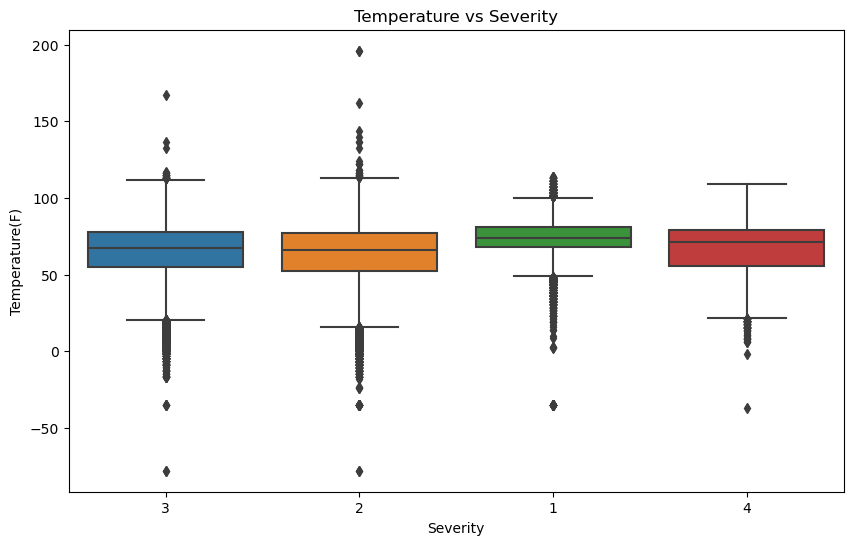

In [45]:
df['Severity'] = df['Severity'].astype(str)  # Convert to string 

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Severity', y='Temperature(F)')
plt.title('Temperature vs Severity')

Text(0.5, 1.0, 'Precipitation vs Severity')

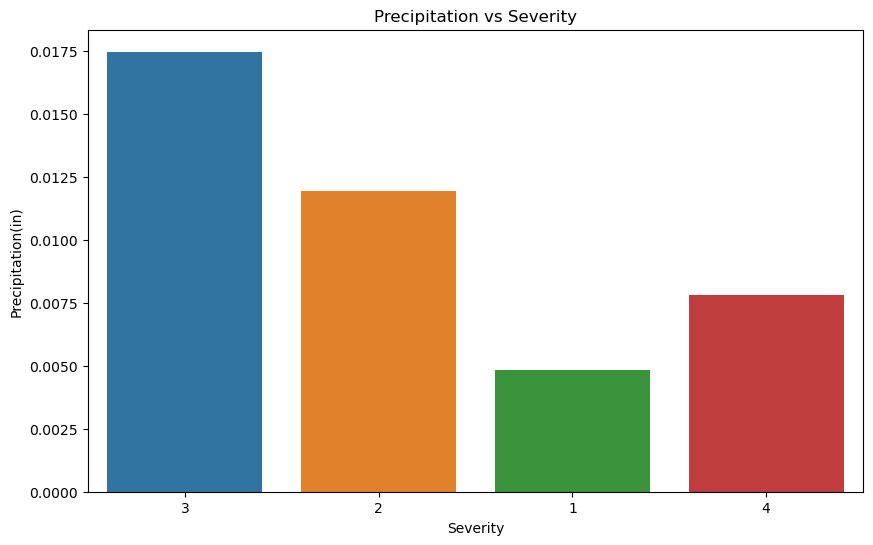

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Severity', y='Precipitation(in)',errorbar=None)
plt.title('Precipitation vs Severity')

Text(0.5, 1.0, 'Wind_Speed(mph) vs Severity')

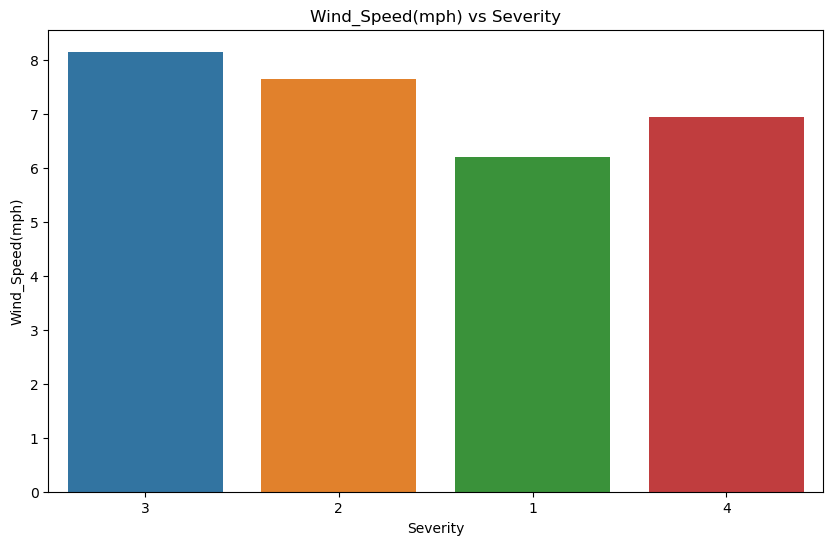

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Severity', y='Wind_Speed(mph)',errorbar=None)
plt.title('Wind_Speed(mph) vs Severity')

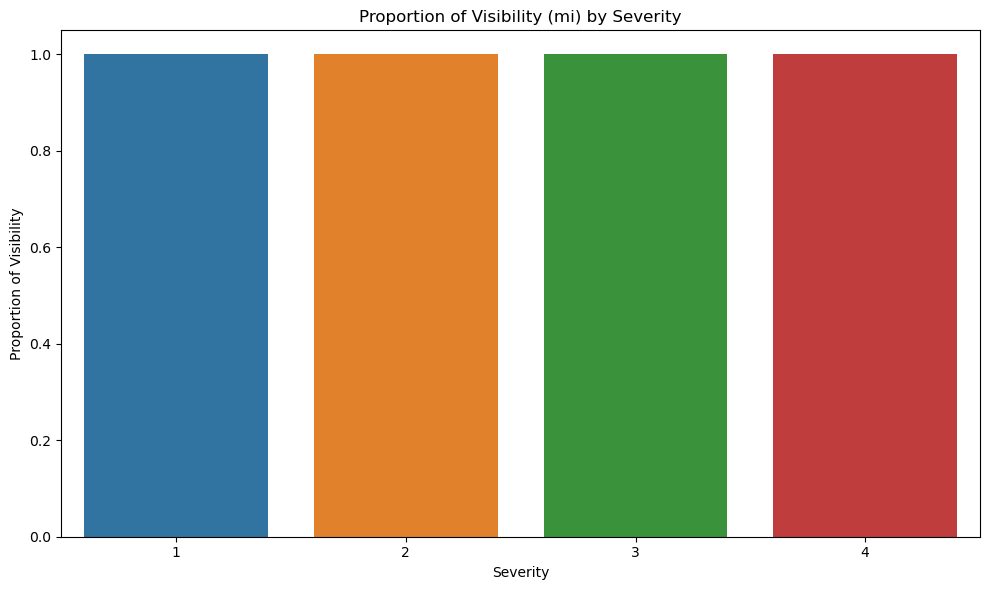

In [51]:
# Normalize Visibility(mi) for each Severity category
df_copy = df.copy()
df_copy['Visibility_Proportion'] = df.groupby('Severity')['Visibility(mi)'].transform(lambda x: x / x.sum())

# Aggregate the proportions for each Severity level
proportion_df = df_copy.groupby('Severity')['Visibility_Proportion'].sum().reset_index()

# Plot bar chart with proportions
plt.figure(figsize=(10, 6))
sns.barplot(data=proportion_df, x='Severity', y='Visibility_Proportion', errorbar=None)
plt.title('Proportion of Visibility (mi) by Severity')
plt.xlabel('Severity')
plt.ylabel('Proportion of Visibility')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distance vs Severity')

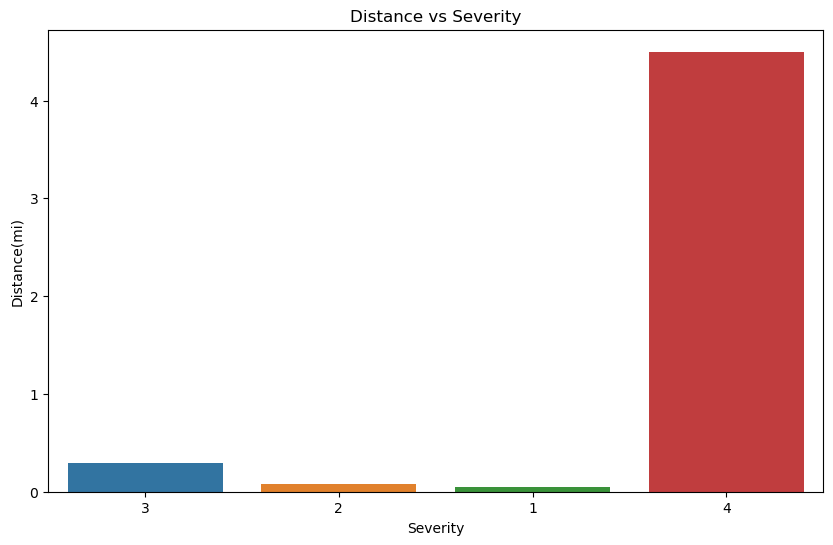

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Severity', y='Distance(mi)',errorbar=None)
plt.title('Distance vs Severity')

### Categorical col vs Severity

In [20]:
df[df_cat].head()

,Source,Start_Time,End_Time,Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Wind_Direction,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,Source2,2016-02-08 05:46:00,2016-02-08 11:00:00,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,Calm,Light Rain,Night,Night,Night,Night
1,Source2,2016-02-08 06:07:59,2016-02-08 06:37:59,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,Calm,Light Rain,Night,Night,Night,Day
2,Source2,2016-02-08 06:49:27,2016-02-08 07:19:27,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,SW,Overcast,Night,Night,Day,Day
3,Source2,2016-02-08 07:23:34,2016-02-08 07:53:34,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,SW,Mostly Cloudy,Night,Day,Day,Day
4,Source2,2016-02-08 07:39:07,2016-02-08 08:09:07,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,SW,Mostly Cloudy,Day,Day,Day,Day


In [21]:
df_cat

['Source',
 'Start_Time',
 'End_Time',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Wind_Direction',
 'Weather_Condition',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

* State vs Severity
* Zipcode vs Severity
* Civil_twilight vs Severity
* Weather vs Severity
* Wind vs Severity

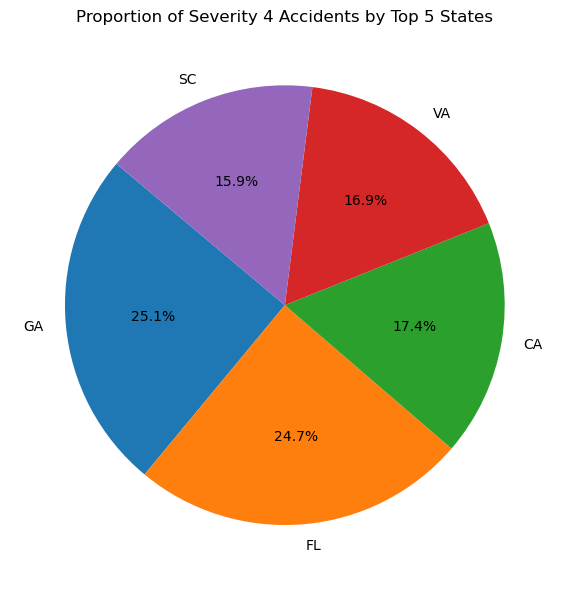

In [22]:
most_severe_accidents = df[df['Severity'] == '4']

# Count occurrences of severity 4 by state
state_severity_counts = most_severe_accidents['State'].value_counts().reset_index()
state_severity_counts.columns = ['State', 'Count']

# Select only the top 5 states
top_5_states = state_severity_counts.head(5)

# Plot the top 5 states with the most severe accidents
plt.figure(figsize=(6,6))
plt.pie(top_5_states['Count'], labels=top_5_states['State'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Severity 4 Accidents by Top 5 States')
plt.tight_layout()
plt.show()

In [23]:
most_severe_accidents = df[df['Severity'] == '1']

# Count occurrences of severity 4 by state
zip_severity_counts = most_severe_accidents['Zipcode'].value_counts()

In [24]:
zip_severity_counts.head()

Zipcode
28262    84
28205    77
28208    75
33913    68
29605    64
Name: count, dtype: int64

<Axes: xlabel='Zipcode'>

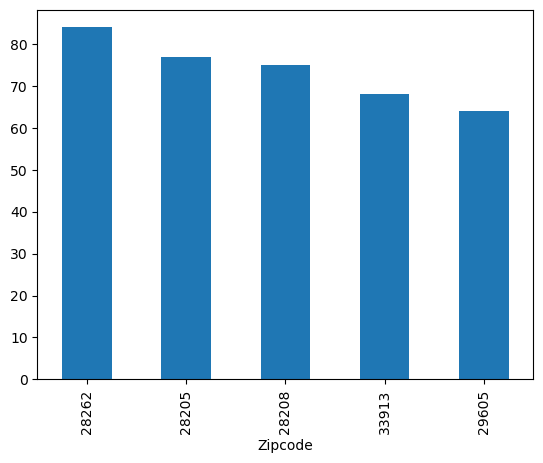

In [25]:
zip_severity_counts.head().plot(kind='bar')

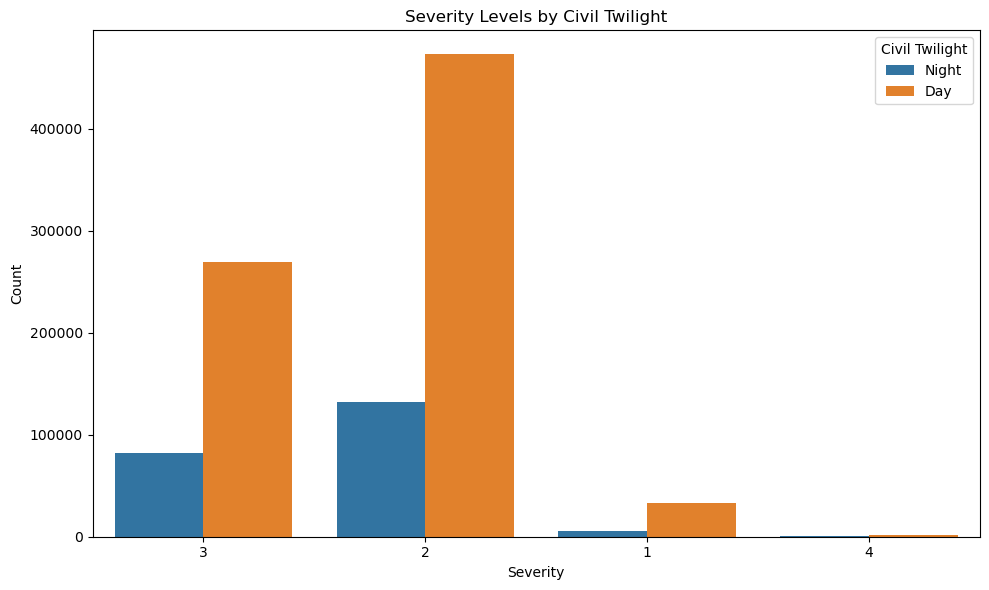

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Severity', hue='Civil_Twilight')
plt.title('Severity Levels by Civil Twilight')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.legend(title='Civil Twilight')
plt.tight_layout()
plt.show()

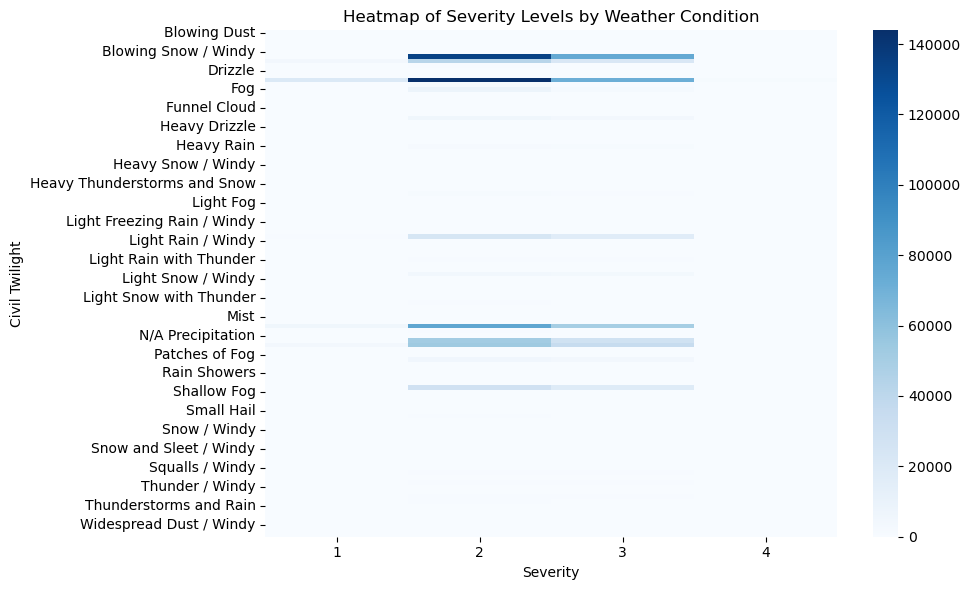

In [27]:
heatmap_data = df.groupby(['Weather_Condition', 'Severity']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, fmt='d', cmap='Blues')
plt.title('Heatmap of Severity Levels by Weather Condition')
plt.xlabel('Severity')
plt.ylabel('Civil Twilight')
plt.tight_layout()
plt.show()

### Boolean cols vs Severity

In [28]:
df[df_bool].head()

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False


In [29]:
df_bool

['Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop']

* Bump vs Severity
* Junction vs Severity
* Traffic Signal vs Severity

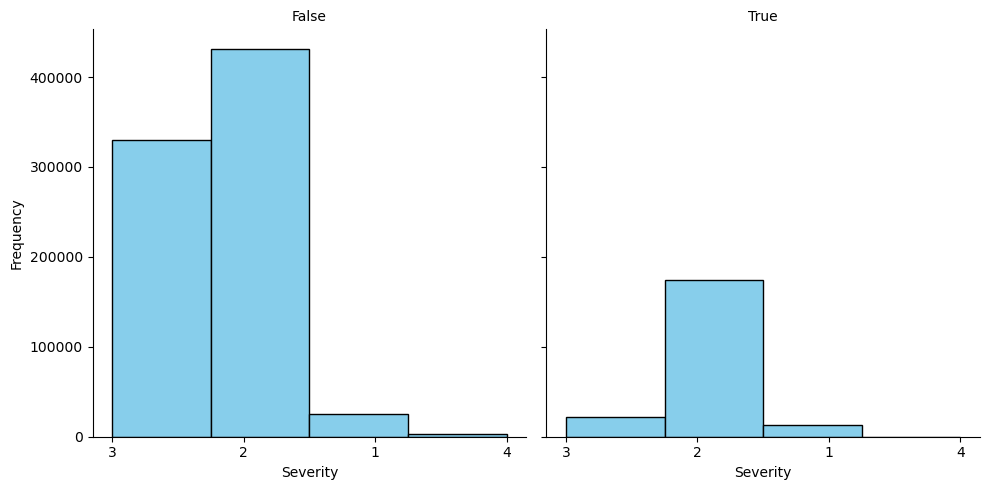

In [58]:
g = sns.FacetGrid(df, col='Traffic_Signal', height=5, aspect=1)
g.map(plt.hist, 'Severity', bins=4, color='skyblue', edgecolor='black')
g.set_titles('{col_name}')
g.set_axis_labels('Severity', 'Frequency')
plt.tight_layout()
plt.show()

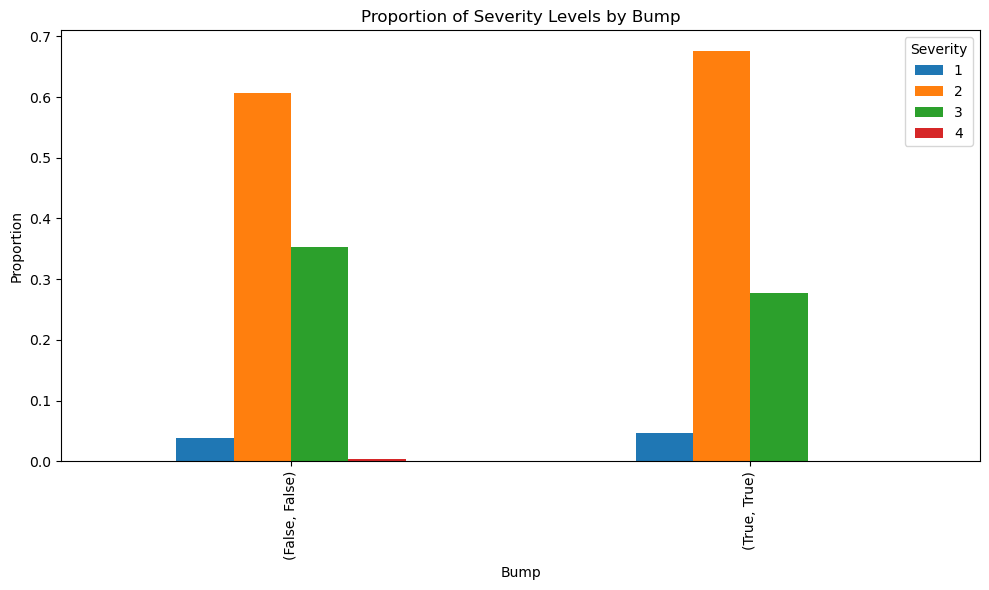

In [32]:
bump_proportions = df.groupby(['Bump', 'Severity']).size().groupby(level=0).apply(lambda x: x / x.sum()).unstack()

bump_proportions.plot(kind='bar', figsize=(10, 6))
plt.title('Proportion of Severity Levels by Bump')
plt.xlabel('Bump')
plt.ylabel('Proportion')
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

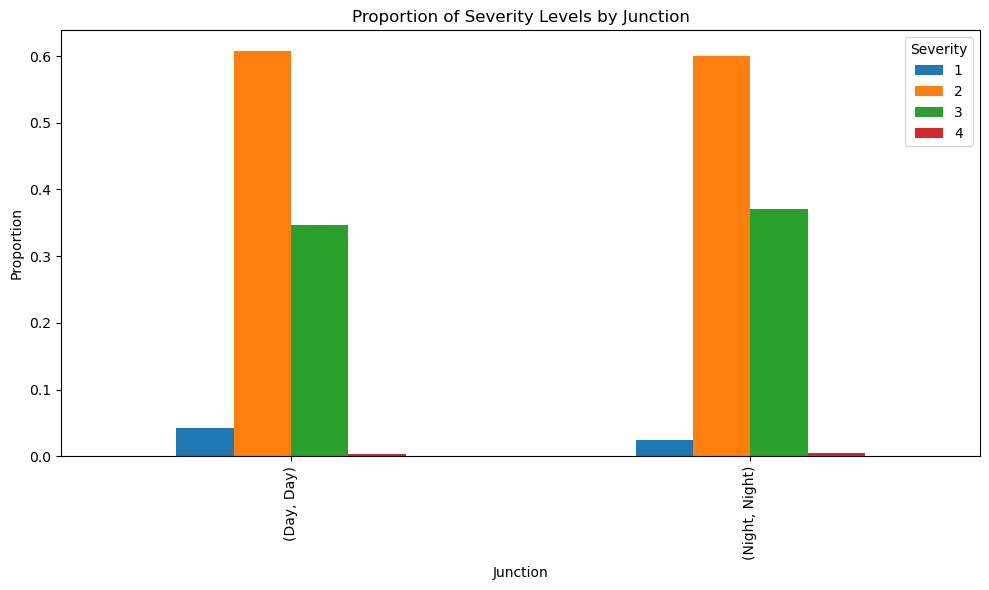

In [37]:
bump_proportions = df.groupby(['Junction', 'Severity']).size().groupby(level=0).apply(lambda x: x / x.sum()).unstack()

bump_proportions.plot(kind='bar', figsize=(10, 6))
plt.title('Proportion of Severity Levels by Junction')
plt.xlabel('Junction')
plt.ylabel('Proportion')
plt.legend(title='Severity')
plt.tight_layout()
plt.show()